In [46]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import welch, csd

from apread import APReader

# Set up the plotting parameters.
width = 426.8       # Latex document width in pts
inch_pr_pt = 1/72.27        # Ratio between pts and inches

golden_ratio = (np.sqrt(5) - 1)/2
fig_width = width*inch_pr_pt
fig_height = fig_width*golden_ratio
fig_size = [fig_width, fig_height]

params = {#'backend': 'PS',
          'axes.labelsize': 10,
          'font.size': 10,
          'legend.fontsize': 10,
          'xtick.labelsize': 8,
          'ytick.labelsize': 8,
          'axes.grid': True,
          'text.usetex': True,
          'figure.figsize': fig_size} 

plt.rcParams.update(params)

In [47]:
# Simulation results:

x1 = np.loadtxt('sim_results_x_seaState1_N500')
x4 = np.loadtxt('sim_results_x_seaState4_N500')
x7 = np.loadtxt('sim_results_x_seaState7_N500')
x9 = np.loadtxt('sim_results_x_seaState9_N500')

sim_results = [x1, x4, x7, x9]

dt = 0.01
fs = 1/dt

# Segments for which we want to inspect the response spectra


# Experimental results
exp_results = [
    APReader(r"C:\Users\j-ehy\OneDrive - NTNU\NTNU\9 semester\ProsjektOppgave\mclab\Experiments_MCLab_Fall22\MCL_CSAD_testresults\SS1_Real1_CSAD-1.BIN"),
    APReader(r"C:\Users\j-ehy\OneDrive - NTNU\NTNU\9 semester\ProsjektOppgave\mclab\Experiments_MCLab_Fall22\MCL_CSAD_testresults\SS4_Real1_CSAD-1.BIN"),
    APReader(r"C:\Users\j-ehy\OneDrive - NTNU\NTNU\9 semester\ProsjektOppgave\mclab\Experiments_MCLab_Fall22\MCL_CSAD_testresults\SS7_Real1_CSAD-1.BIN"),
    APReader(r"C:\Users\j-ehy\OneDrive - NTNU\NTNU\9 semester\ProsjektOppgave\mclab\Experiments_MCLab_Fall22\MCL_CSAD_testresults\SS9_Real1_CSAD-2.BIN"),
]

heave_exp = []
pitch_exp = []
for i in range(len(exp_results)):
    t = exp_results[i].Channels[0].data
    t_max = t[-1]
    condition = (t > 1/11*t_max) & (t < 3/11*t_max)
    heave = np.copy(exp_results[i].Channels[3].data - np.mean(exp_results[i].Channels[3].data))
    pitch = np.copy(exp_results[i].Channels[5].data - np.mean(exp_results[i].Channels[5].data))
    heave_exp.append(heave[condition].copy())
    pitch_exp.append(np.deg2rad(pitch[condition].copy()))

dt_exp = np.mean(exp_results[0].Channels[0].data[1:] - exp_results[0].Channels[0].data[0:-1])


In [48]:
sim_response_heave = []
sim_response_pitch = []

exp_response_heave = []
exp_response_pitch = []

for i in range(len(sim_results)):
    f_sim_heave, psd_heave_i = welch(sim_results[i][:, 2], fs=fs, nperseg=2**11)
    f_sim_pitch, psd_pitch_i = welch(sim_results[i][:, 4], fs=fs, nperseg=2**11)
    f_exp_heave, exp_psd_heave_i = welch(heave_exp[i] - np.mean(heave_exp[i]), fs=1/dt_exp, nperseg=2**11)
    f_exp_pitch, exp_psd_pitch_i = welch(pitch_exp[i] - np.mean(pitch_exp[i]), fs=1/dt_exp, nperseg=2**11)
    sim_response_heave.append([f_sim_heave, psd_heave_i])
    sim_response_pitch.append([f_sim_pitch, psd_pitch_i])
    exp_response_heave.append([f_exp_heave, exp_psd_heave_i])
    exp_response_pitch.append([f_exp_pitch, exp_psd_pitch_i])


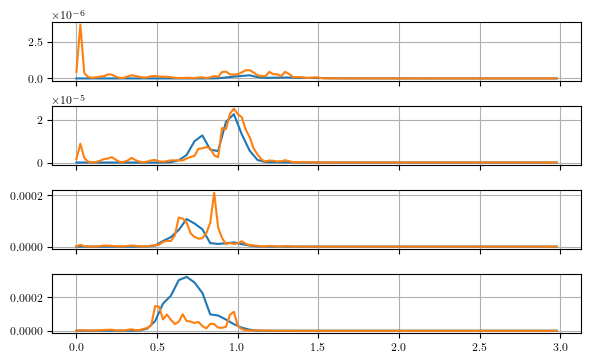

In [49]:
fig, axs = plt.subplots(len(sim_results), 1, sharex=True)
fig.tight_layout()
f_max = 3
for i in range(len(sim_results)):
    plt.sca(axs[i])
    f = sim_response_heave[i][0]
    f_exp = exp_response_heave[i][0]
    psd = sim_response_heave[i][1]
    psd_exp = exp_response_heave[i][1]
    plt.plot(f[f < f_max], psd[f < f_max])
    plt.plot(f_exp[f_exp < f_max], psd_exp[f_exp < f_max])

plt.show()
    

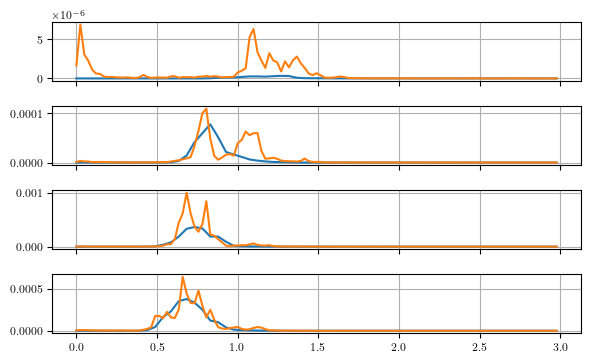

In [50]:
fig, axs = plt.subplots(len(sim_results), 1, sharex=True)
fig.tight_layout()
f_max = 3
for i in range(len(sim_results)):
    plt.sca(axs[i])
    f = sim_response_pitch[i][0]
    f_exp = exp_response_pitch[i][0]
    psd = sim_response_pitch[i][1]
    psd_exp = exp_response_pitch[i][1]
    plt.plot(f[f < f_max], psd[f < f_max])
    plt.plot(f_exp[f_exp < f_max], psd_exp[f_exp < f_max])


plt.show()

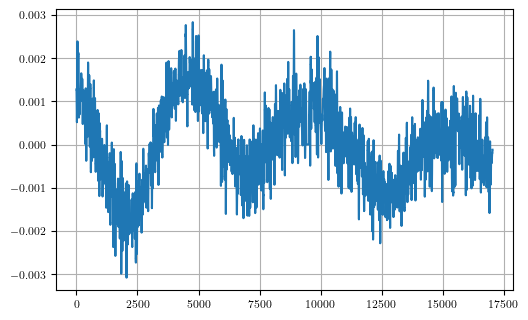

In [51]:
plt.plot(heave_exp[0] - np.mean(heave_exp[0]))